<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [123]:
import pandas as pd

In [124]:
data_info = pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv',index_col='LoanStatNew')

In [125]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [126]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [127]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [129]:
df = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

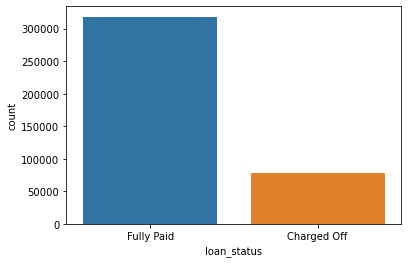

In [131]:
# CODE HERE
sns.countplot(x='loan_status',data = df)

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

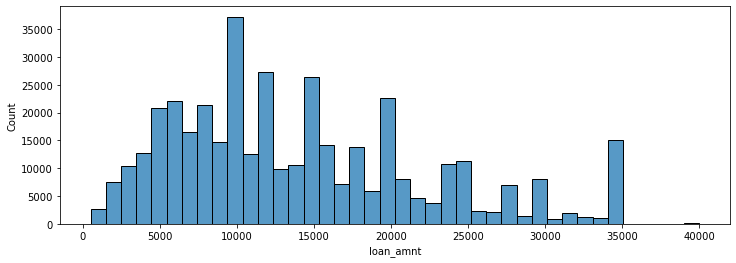

In [132]:
# CODE HERE
plt.figure(figsize=(12,4))
sns.histplot(data=df,x='loan_amnt',bins=40,kde=False)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [133]:
# CODE HERE
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [134]:
feat_info('total_acc'),feat_info('open_acc')

The total number of credit lines currently in the borrower's credit file
The number of open credit lines in the borrower's credit file.


(None, None)

In [135]:
feat_info('pub_rec_bankruptcies'),feat_info('pub_rec')

Number of public record bankruptcies
Number of derogatory public records


(None, None)

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [136]:
feat_info('loan_amnt'),feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


(None, None)

<AxesSubplot:>

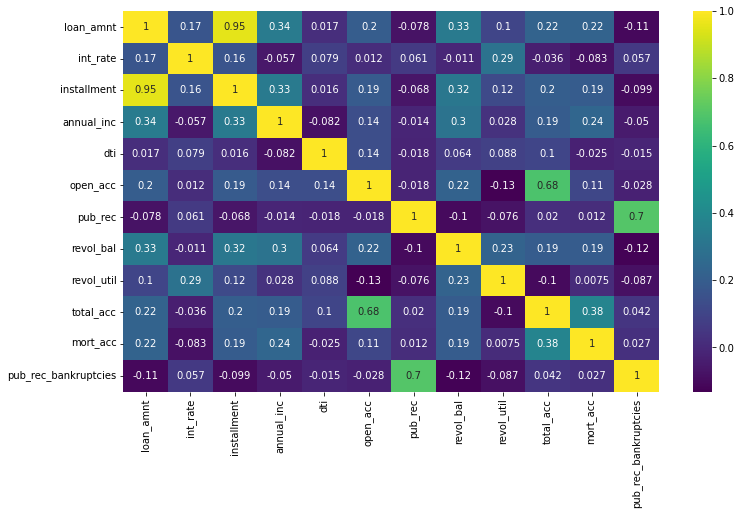

In [137]:
# CODE HERE
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [138]:
# CODE HERE
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [139]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

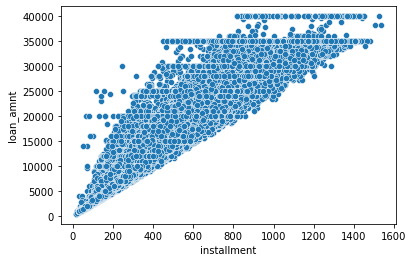

In [140]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

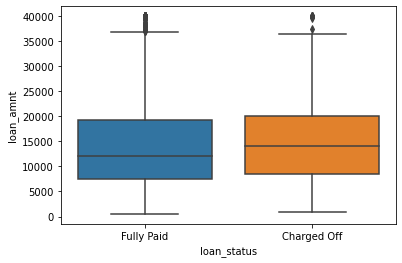

In [141]:
# CODE HERE
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [142]:
# CODE HERE
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [143]:
feat_info('grade'),feat_info('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


(None, None)

In [144]:
# CODE HERE
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [145]:
# df.columns
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

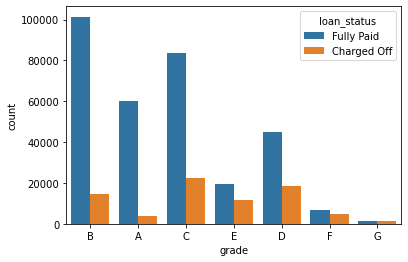

In [146]:
# CODE HERE
sns.countplot(x='grade',data=df,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

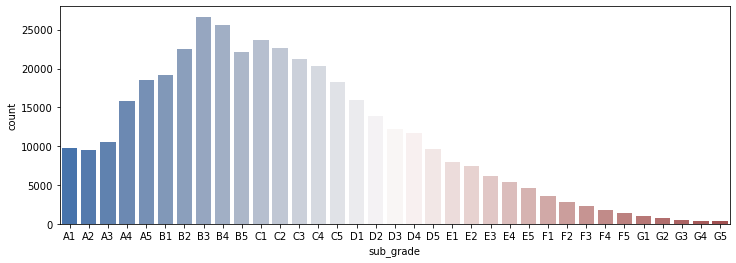

In [147]:
#CODE HERE
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='vlag')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

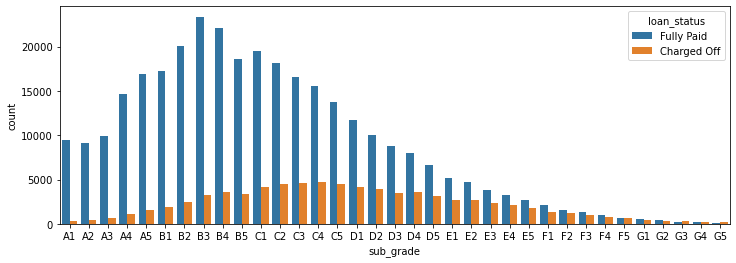

In [148]:
# CODE HERE
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order)

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

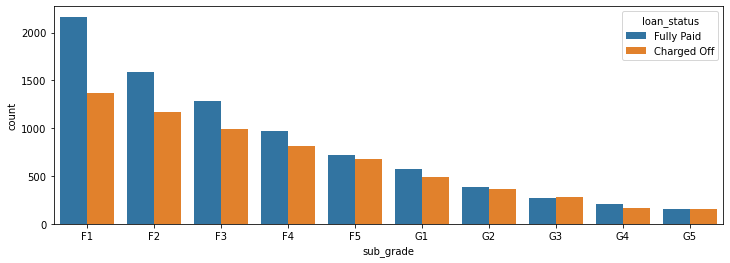

In [149]:
# CODE HERE
plt.figure(figsize=(12,4))
subgrade_order_fg = sorted(df[df['grade'].isin(['F','G'])]['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df[df['grade'].isin(['F','G'])],hue='loan_status',order=subgrade_order_fg)

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [150]:
# CODE HERE
df['loan_repaid'] = np.where(df['loan_status']=='Fully Paid',1,0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [151]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

<AxesSubplot:>

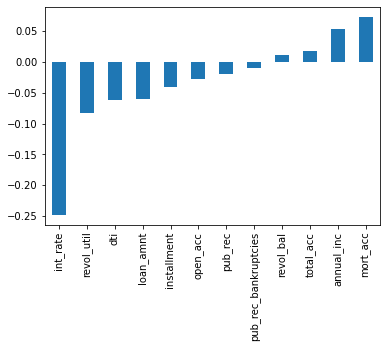

In [152]:
#CODE HERE
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [153]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [154]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [155]:
# CODE HERE
df.shape[0]

396030

In [156]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [157]:
# CODE HERE
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [158]:
feat_info('emp_title'),feat_info('emp_length'),feat_info('title'),feat_info('revol_util'),feat_info('mort_acc')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.


(None, None, None, None, None)

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [159]:
# CODE HERE
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [160]:
# CODE HERE
feat_info('emp_title'),feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


(None, None)

**TASK: How many unique employment job titles are there?**

In [161]:
# CODE HERE
df['emp_title'].nunique()

173105

In [162]:
df.groupby('emp_title').count()['loan_amnt'].sort_values(ascending=False)

emp_title
Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Hy Powered                             1
Hy Vee                                 1
Hy-Vee Food Store                      1
HyPro, Inc.                            1
​License Compliance Investigator       1
Name: loan_amnt, Length: 173105, dtype: int64

In [163]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [164]:
# CODE HERE

In [165]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [166]:
# CODE HERE
sort_emp_length = sorted(df['emp_length'].dropna().unique())
sort_emp_length = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]
sort_emp_length

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

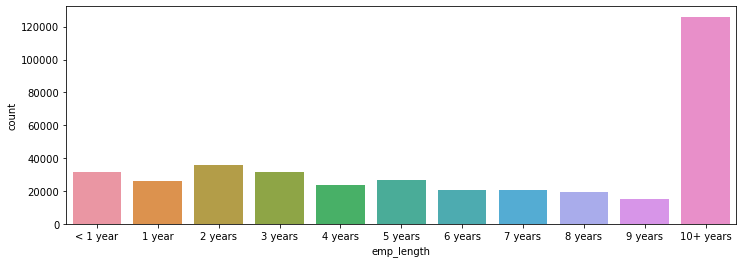

In [167]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sort_emp_length)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

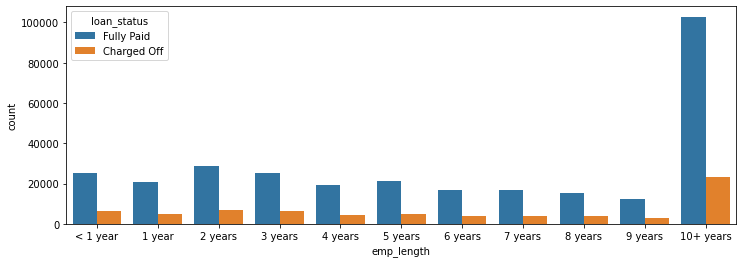

In [168]:
# CODE HERE
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sort_emp_length,hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [169]:
# CODE HERE

In [170]:
df_emp_length = df[df['loan_status']=='Fully Paid']['emp_length'].value_counts().reset_index().merge(
    df[df['loan_status']=='Charged Off']['emp_length'].value_counts().reset_index(),on='index',how='inner'
)

df_emp_length['per_Charged_Off'] =  df_emp_length['emp_length_y']/df_emp_length['emp_length_x']
df_emp_length = df_emp_length[['index','per_Charged_Off']].sort_values('per_Charged_Off',ascending=False)
df_emp_length

,index,per_Charged_Off
3,< 1 year,0.260830
10,9 years,0.250735
9,8 years,0.249625
5,1 year,0.248649
2,3 years,0.242593
8,7 years,0.241887
1,2 years,0.239560
6,4 years,0.238213
4,5 years,0.237911
7,6 years,0.233341


In [171]:
emp_len = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']/\
    df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='index', ylabel='per_Charged_Off'>

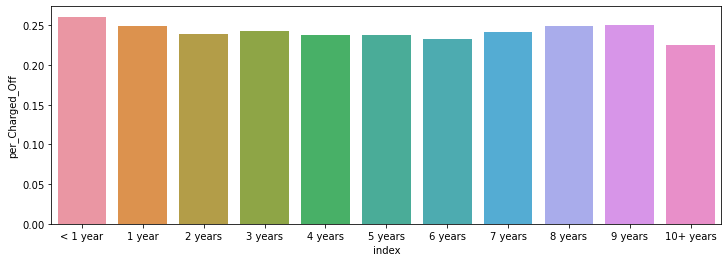

In [172]:
plt.figure(figsize=(12,4))
sns.barplot(x='index',y='per_Charged_Off',data=df_emp_length,order=sort_emp_length)

<AxesSubplot:xlabel='emp_length'>

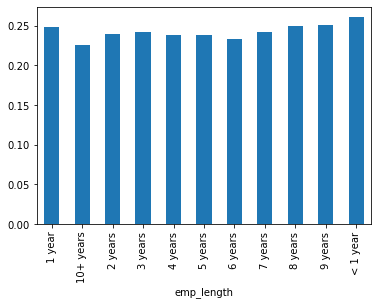

In [173]:
emp_len.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [174]:
# CODE HERE
df = df.drop('emp_length',axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [175]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [176]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [177]:
# CODE HERE
df['title'],'\n',df['purpose']

(0                        Vacation
 1              Debt consolidation
 2         Credit card refinancing
 3         Credit card refinancing
 4           Credit Card Refinance
                    ...           
 396025         Debt consolidation
 396026         Debt consolidation
 396027       pay off credit cards
 396028              Loanforpayoff
 396029          Toxic Debt Payoff
 Name: title, Length: 396030, dtype: object,
 '\n',
 0                   vacation
 1         debt_consolidation
 2                credit_card
 3                credit_card
 4                credit_card
                  ...        
 396025    debt_consolidation
 396026    debt_consolidation
 396027    debt_consolidation
 396028    debt_consolidation
 396029    debt_consolidation
 Name: purpose, Length: 396030, dtype: object)

In [178]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [179]:
# CODE HERE

In [180]:
df = df.drop('title',axis=1)
df.shape,df.columns

((396030, 25),
 Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
        'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'application_type', 'mort_acc',
        'pub_rec_bankruptcies', 'address', 'loan_repaid'],
       dtype='object'))

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [181]:
# CODE HERE
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [182]:
# CODE HERE
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [183]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [184]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [185]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [186]:
# CODE HERE

In [187]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [188]:
total_acc_avg[3]

0.05202312138728324

In [189]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        mort_acc = total_acc_avg[total_acc]
        return mort_acc
    else:
        return mort_acc

In [190]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [191]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [192]:
# CODE HERE

In [193]:
df = df.dropna()

In [194]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [68]:
# CODE HERE
df.dtypes[df.dtypes == 'object'].reset_index()['index'].to_list()

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [195]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [196]:
# CODE HERE
df['term'] = df['term'].apply(lambda x: int(x.replace(' months','')))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [197]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [ ]:
# df['term'] = df['term'].apply(lambda term: int(term[:3]))

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [ ]:
# CODE HERE

In [198]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [ ]:
# CODE HERE

In [199]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
# subgrade_dummies

In [200]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [201]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [202]:
df['verification_status'].nunique(),\
df['application_type'].nunique(),\
df['initial_list_status'].nunique(),\
df['purpose'].nunique()

(3, 3, 2, 14)

In [76]:
# # CODE HERE
# verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
# application_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)
# initial_list_status_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
# purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)


In [77]:
# df = pd.concat([
#     df.drop(columns=['verification_status','application_type','initial_list_status','purpose']),
#     verification_status_dummies,
#     application_type_dummies,
#     initial_list_status_dummies,
#     purpose_dummies,
# ],axis=1)

In [203]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [204]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [205]:
#CODE HERE
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [206]:
# #CODE HERE
# home_ownership_dummies =  df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})
# home_ownership_dummies = pd.get_dummies(home_ownership_dummies,drop_first=True)
# home_ownership_dummies

In [207]:
# df = pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)
# df.shape,df.columns

In [208]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [209]:
#CODE HERE
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [210]:
# zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
# df = pd.concat([df.drop(['address','zip_code'],axis=1),zip_code_dummies])
# df.columns

In [211]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [84]:
feat_info('issue_d')

The month which the loan was funded


In [212]:
#CODE HERE
df = df.drop('issue_d',axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [213]:
# #CODE HERE
# df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]) if type(x)==str else x)
# df = df.drop('earliest_cr_line',axis=1)
# df.columns

In [214]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [215]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [216]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [217]:
# CODE HERE
df = df.drop('loan_status',axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

**TASK: Set X and y variables to the .values of the features and label.**

In [218]:
#CODE HERE
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [219]:
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
48052               0
70466               0
86630               0
93700               0
earliest_cr_year    0
Length: 79, dtype: int64

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [220]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [267]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [222]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [223]:
scaler = MinMaxScaler()

In [268]:
X_train = scaler.fit_transform(X_train)

In [269]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [271]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation = 'relu'))
model.add(Dropout(0.2))

#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [272]:
# CODE HERE
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2973 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2655 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2618 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2610 - val_loss: 0.2624
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2602 - val_loss: 0.2623
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2594 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2593 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.259

**TASK: OPTIONAL: Save your model.**

In [245]:
# CODE HERE
from tensorflow.keras.models import load_model

In [273]:
model.save('full_data_project_model.h5')  

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [ ]:
# CODE HERE

In [274]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

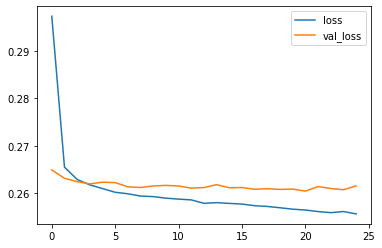

In [275]:
losses[['loss','val_loss']].plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [ ]:
# CODE HERE

In [261]:
from sklearn.metrics import classification_report,confusion_matrix

In [276]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

In [277]:
# type(y_test),type(predictions)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [278]:
y_test

array([1, 1, 1, ..., 0, 1, 0])

In [279]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [280]:
confusion_matrix(y_test,predictions)

array([[ 6857,  8801],
       [  107, 63279]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [281]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [283]:
# CODE HERE
np.round(model.predict(new_customer.values.reshape(1,78))).astype(int)

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE

In [284]:
df.iloc[random_ind]['loan_repaid']

1.0

# GREAT JOB!